<p><b><i><pre><span style="color:#ADD8E6;font-size:0.75em;">
Giả sử dữ liệu tuân theo mô hình hồi quy tuyến tính, tức là có hàm dự báo f(x)=b+wx.
 a) Thực thi mã lệnh với thư viện scikit-learn xác định các tham số b, w, và dự đoán f(4). Từ đó:
   i) Xác định giá trị hàm mục tiêu MSE sau khi tối ưu mô hình.
   ii) Trực quan hóa dữ liệu bao gồm: các điểm dữ liệu, điểm dự đoán, và đường hồi quy.
 b) Xác định các tham số b, w bằng phương trình chuẩn. So sánh kết quả với ý (a).
 c) Xác định các tham số b, w bằng phương pháp khai triển kỳ dị. So sánh kết quả với ý (a).

In [26]:
import numpy as np 
from sklearn import linear_model
import matplotlib.pyplot as plt

In [27]:
reg = linear_model.LinearRegression()

In [28]:
X = np.array([[1], [2], [3], [3], [5]]).reshape(-1, 1)
Y = np.array([0, 3, 2, 4, 5])

<p><b><i><pre><span style="color:#ADD8E6;font-size:0.75em;"> a.


<p><b><i><scan=>

In [29]:
reg.fit(X, Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
w = reg.coef_
w

array([1.11363636])

In [31]:
b = reg.intercept_
b

np.float64(-0.31818181818181923)

In [32]:
reg.predict([[4]])

array([4.13636364])

<p><b><i><pre><span style="color:#ADD8E6;font-size:0.75em;">a.i.MSE

In [33]:
m = len(X)
1 / m * np.linalg.norm((X.reshape(-1, 1) @ w - Y)) ** 2

np.float64(0.8785123966942152)

<p><b><i><pre><span style="color:#ADD8E6;font-size:0.75em;">a.ii

In [34]:
A = np.concatenate((np.ones(shape=(len(X), 1)), X), axis= 1)
A

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 3.],
       [1., 5.]])

In [35]:
c = np.linalg.inv(A.T @ A) @ A.T @ Y 
c

array([-0.31818182,  1.11363636])

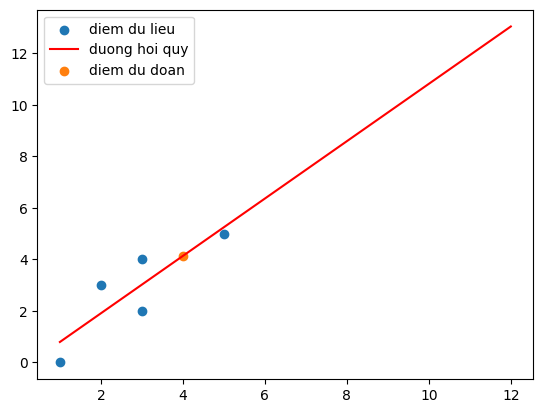

In [38]:
X_grid = np.linspace(1,12,101)
Y_grid = ([c @ np.array([1, x]) for x in X_grid])
plt.scatter(X, Y, label='diem du lieu')
plt.plot(X_grid, Y_grid, label='duong hoi quy', color='red')
plt.scatter([[4]], reg.predict([[4]]), label='diem du doan')
plt.legend()
plt.show()


<p><b><i><pre><span style="color:#ADD8E6;font-size:0.75em;">b. phuong trinh chuan 

In [41]:
b, w = np.linalg.inv(A.T @ A) @ A.T @ Y 
b

np.float64(-0.31818181818181945)

In [42]:
w

np.float64(1.1136363636363642)

<p><b><i><pre><span style="color:#ADD8E6;font-size:0.75em;"> c. khai trien ky di

In [43]:
U, S, Vt = np.linalg.svd(A, full_matrices=False)
U

array([[ 0.17214924,  0.73385725],
       [ 0.30488984,  0.42399228],
       [ 0.43763045,  0.11412732],
       [ 0.43763045,  0.11412732],
       [ 0.70311166, -0.5056026 ]])

In [44]:
S_inv = np.diag([1 / s if s > 1e-10 else 0 for s in S])
S_inv

array([[0.13846699, 0.        ],
       [0.        , 1.08874806]])

In [45]:
Vt

array([[ 0.28460667,  0.95864438],
       [ 0.95864438, -0.28460667]])

In [46]:
b, w = Vt.T @ S_inv @ U.T @ Y
b

np.float64(-0.31818181818181757)

In [47]:
w

np.float64(1.113636363636364)